In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/reviews_cleaned.csv",
                 quotechar='"',
                 dtype={"rating": np.int})

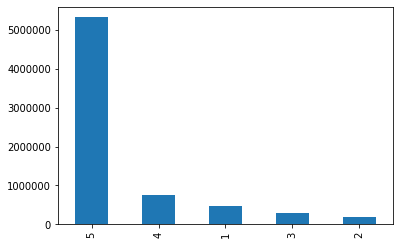

In [8]:
df['rating'].value_counts().plot(kind='bar')

In [13]:
# Create a new label column
conditions = [
    (df['rating'] < 3),
    (df['rating'] == 3),
    (df['rating'] > 3)
]
choices = ['bad', 'average', 'good']
label_col = pd.Series(np.select(conditions, choices, default='good'))

good       6063734
bad         665595
average     297563
dtype: int64


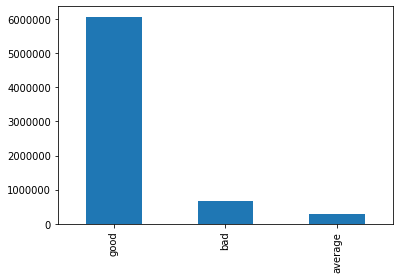

In [14]:
print(label_col.value_counts())
label_col.value_counts().plot(kind='bar')

In [27]:
df.groupby('label').count()

,comment,rating,trustpilot_url,company_url,company_name,company_logo
label,,,,,,
average,297563,297563,297563,297563,297563,297563
bad,665595,665595,665595,665595,665595,665595
good,6063734,6063734,6063734,6063734,6063734,6063734


In [50]:
train_ratio = 0.8

train_dfs = []
val_dfs = []

for category in list(df['label'].unique()):
    shuffled_samples = df.loc[df['label'] == category].sample(frac=1)
    
    num_class_samples = len(shuffled_samples)
    num_class_train = int(num_class_samples * train_ratio)
    
    train_dfs.append(shuffled_samples.iloc[:num_class_train])
    val_dfs.append(shuffled_samples.iloc[num_class_train:])
    
train_df = pd.concat(train_dfs, ignore_index=True)
val_df = pd.concat(val_dfs, ignore_index=True)


In [31]:
for category in df['label'].unique():
    print(category)

good
bad
average


In [42]:
cats = list(df['label'].unique())

In [48]:
len(df)

7026892

In [51]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            29G        6.1G         14G        298M        9.1G         22G
Swap:            0B          0B          0B


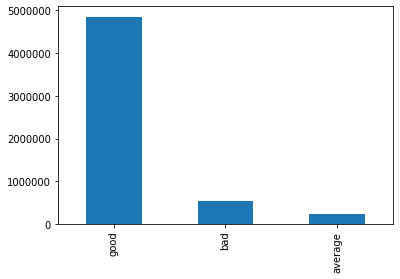

In [52]:
train_df["label"].value_counts().plot(kind='bar')

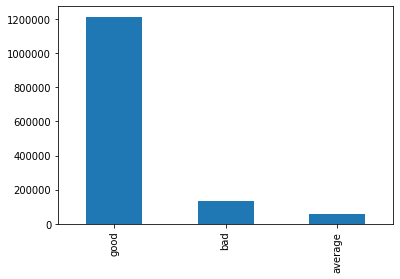

In [53]:
val_df["label"].value_counts().plot(kind='bar')

In [58]:
print(train_df.isnull().values.any())
print(train_df['comment'].str.isnumeric().any())
print(val_df.isnull().values.any())
print(val_df['comment'].str.isnumeric().any())

False
False
False
False


In [60]:
train_df.to_csv("train.csv", index=False, quotechar='"')
val_df.to_csv("val.csv", index=False, quotechar='"')

In [62]:
# Double check by loading the saved csv again
train = pd.read_csv("train.csv", quotechar='"')
val = pd.read_csv("val.csv", quotechar='"')

In [65]:
print(train.isnull().values.any())
print(train['comment'].str.isnumeric().any())
print(val.isnull().values.any())
print(val['comment'].str.isnumeric().any())

False
False
False
False


In [66]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            29G        8.3G        9.7G        306M         11G         20G
Swap:            0B          0B          0B
